In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [3]:
data = sns.load_dataset("mpg")

In [4]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


<Axes: >

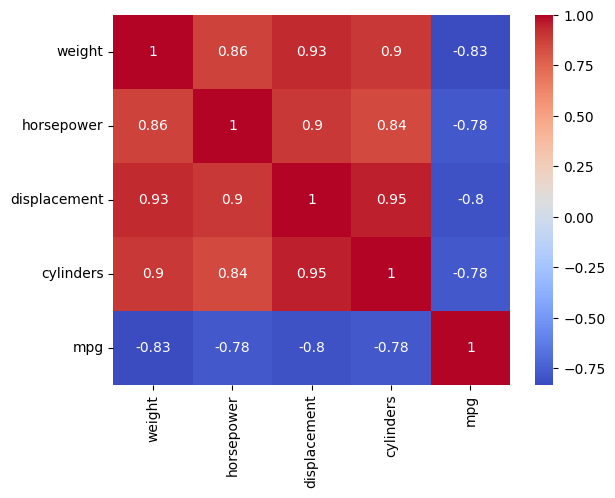

In [5]:
corr_matrix = data[["weight", "horsepower", "displacement", "cylinders", "mpg"]].corr()
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True)

In [6]:
df = data[["displacement", "weight", "horsepower", "mpg"]]

In [7]:
df.dropna(axis=0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  392 non-null    float64
 1   weight        392 non-null    int64  
 2   horsepower    392 non-null    float64
 3   mpg           392 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 15.3 KB


C:\Users\Matrix\AppData\Local\Temp\ipykernel_3272\2534860276.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=0, inplace=True)


In [8]:
z = zscore(df[["horsepower", "displacement", "weight", "mpg"]])
df = df[(np.abs(z) <= 3).all(axis=1)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 387 entries, 0 to 397
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  387 non-null    float64
 1   weight        387 non-null    int64  
 2   horsepower    387 non-null    float64
 3   mpg           387 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 15.1 KB


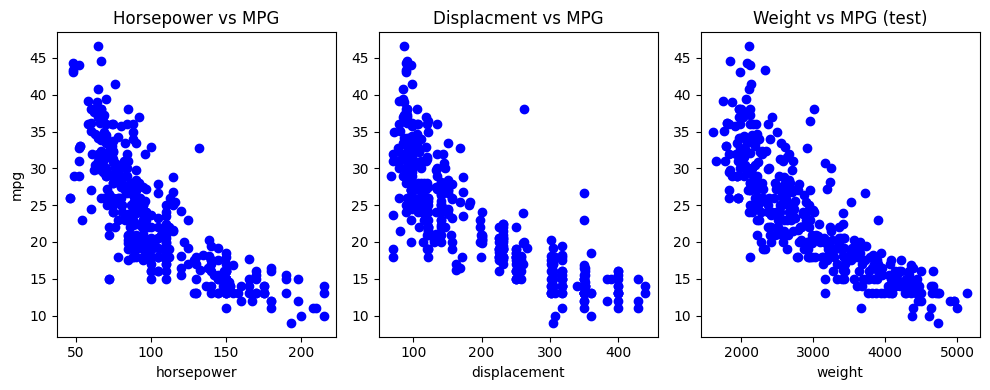

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 4))

ax1.scatter(df.horsepower, df.mpg, color="b")
ax1.set_xlabel("horsepower")
ax1.set_ylabel("mpg")
ax1.set_title("Horsepower vs MPG")

ax2.scatter(df.displacement, df.mpg, color="b")
ax2.set_xlabel("displacement")
ax2.set_title("Displacment vs MPG")

ax3.scatter(df.weight, df.mpg, color="b")
ax3.set_xlabel("weight")
ax3.set_title("Weight vs MPG (test)")

plt.tight_layout()

In [ ]:
x = df[["displacement", "horsepower", "weight"]]
y = df["mpg"]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)

,displacement,horsepower,weight
244,90.0,48.0,1985
386,181.0,110.0,2945
199,225.0,100.0,3651
86,304.0,150.0,3672
230,350.0,170.0,4165
...,...,...,...
75,318.0,150.0,4077
111,70.0,90.0,2124
277,163.0,133.0,3410
358,120.0,74.0,2635


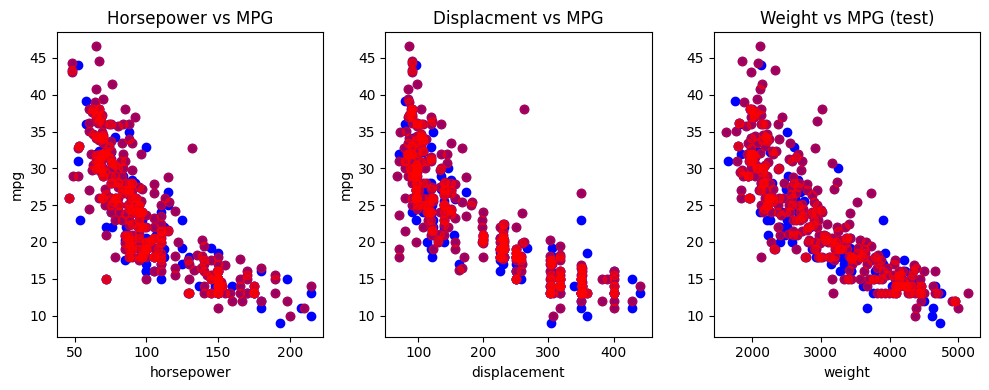

In [18]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 4))

ax1.scatter(df.horsepower, df.mpg, color="b")
ax1.scatter(x_train.horsepower, y_train, color="r", alpha=0.6)
ax1.set_xlabel("horsepower")
ax1.set_ylabel("mpg")
ax1.set_title("Horsepower vs MPG")

ax2.scatter(df.displacement, df.mpg, color="b")
ax2.scatter(x_train.displacement, y_train, color="r", alpha=0.6)
ax2.set_xlabel("displacement")
ax2.set_ylabel("mpg")
ax2.set_title("Displacment vs MPG")

ax3.scatter(df.weight, df.mpg, color="b")
ax3.scatter(x_train.weight, y_train, color="r", alpha=0.6)
ax3.set_xlabel("weight")
ax3.set_title("Weight vs MPG (test)")

plt.tight_layout()

In [20]:
model = LinearRegression()
model.fit(x_train, y_train)

coef = model.coef_
intercept = model.intercept_

print(f"coef: {coef}\nintercept: {intercept}")

coef: [-0.01031919 -0.05016281 -0.0047911 ]
intercept: 45.07175741512904


In [21]:
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}\nMAE: {mae:.2f}\nR2: {r2:.2f}")

MSE: 18.36
MAE: 3.53
R2: 0.65


In [23]:
r2_train = r2_score(y_train, model.predict(x_train))
r2_test = r2_score(y_test, y_pred)

print(f"Train: {r2_train:.2f}\nTest: {r2_test:.2f}\nDifference: {r2_train - r2_test:.4f}")

Train: 0.71
Test: 0.65
Difference: 0.0628


In [24]:
residuals = y_test - y_pred

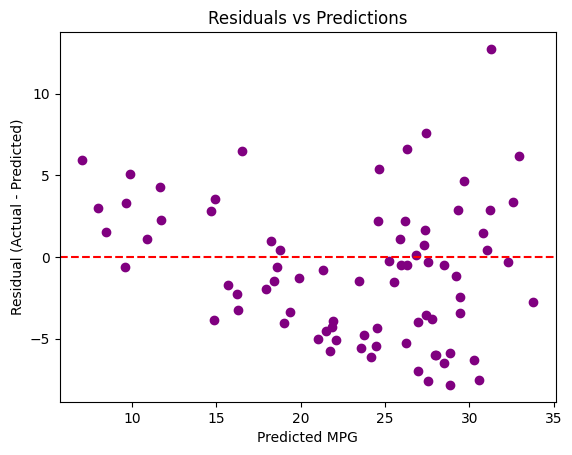

In [25]:
plt.scatter(y_pred, residuals, color="purple")
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted MPG")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residuals vs Predictions")
plt.show()


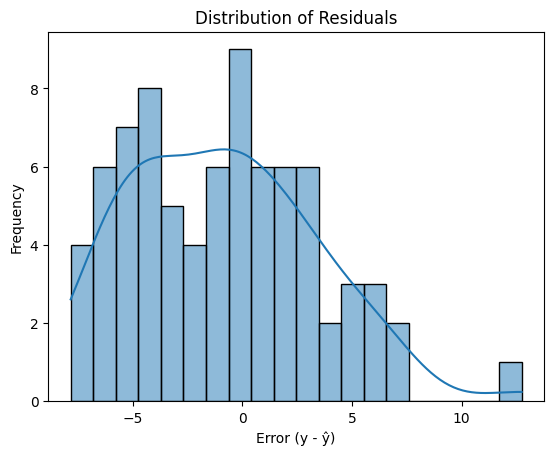

In [26]:
sns.histplot(residuals, bins=20, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Error (y - ŷ)")
plt.ylabel("Frequency")
plt.show()